In [1]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 
%cd "/content/gdrive/MyDrive/Reto2/datasets"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
/content/gdrive/MyDrive/Reto2/datasets


# Modelo de regresion logistica usando sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, confusion_matrix

In [ ]:
dataset_full = pd.read_csv('trips2.csv')
dataset_full

,Unnamed: 0,origin,destination,lon,lat,start_time,end_time
0,0,VITACURA,LAS CONDES,-70.5699,-33.3994,555,10116
1,1,VITACURA,VITACURA,-70.5419,-33.3806,10455,34305
2,2,VITACURA,LAS CONDES,-70.5699,-33.3994,35503,48103
3,3,VITACURA,LAS CONDES,-70.5699,-33.3994,48680,76746
4,4,LAS CONDES,VITACURA,-70.5419,-33.3806,77348,83940
...,...,...,...,...,...,...,...
4196038,4196038,PEÑAFLOR,MAIPÚ,-70.7950,-33.5545,4904,70588
4196039,4196039,VITACURA,VITACURA,-70.5700,-33.3851,2801,84522
4196040,4196040,PUENTE ALTO,PUENTE ALTO,-70.5975,-33.6142,231,81361
4196041,4196041,LAS CONDES,LAS CONDES,-70.5587,-33.4163,869,5687


In [ ]:
dataset_full = pd.read_csv('trips2.csv')
comunas_origin = dataset_full['origin']
comunas_origin = pd.get_dummies(comunas_origin)
dataset_full = dataset_full.join(comunas_origin)
dataset_full = dataset_full.drop(['Unnamed: 0','lon','lat','origin'], axis=1)

In [ ]:
df_x = dataset_full.loc[:, dataset_full.columns != 'destination']

df_y = dataset_full["destination"]

 ########################### separación de los datos y entrenamiento del modelo ###############################
Xtrain, Xtest, ytrain, ytest = train_test_split(df_x.values, df_y.values,random_state=1) 
model = LogisticRegression(fit_intercept = True)
model.fit(Xtrain,ytrain)
pred_y = model.predict(Xtest)
acc = accuracy_score(ytest, pred_y)

In [ ]:
########################## accuracy ########################
print("accuracy of the model: "+ str(acc))


accuracy of the model: 0.06548930373466055


# Modelo random forest Tensorflow

In [ ]:
# Install TensorFlow Decision Forests
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.2 MB 581 kB/s 
     |████████████████████████████████| 588.3 MB 5.5 kB/s 
     |████████████████████████████████| 439 kB 21.8 MB/s 
     |████████████████████████████████| 6.0 MB 38.7 MB/s 
     |████████████████████████████████| 1.7 MB 18.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1

In [ ]:
columnas = ['destination', 'start_time', 'end_time', '0', 'ALHUÉ', 'BUIN',
       'CALERA DE TANGO', 'CERRILLOS', 'CERRO NAVIA', 'COLINA', 'CONCHALÍ',
       'CURACAVÍ', 'EL BOSQUE', 'EL MONTE', 'ESTACIÓN CENTRAL', 'HUECHURABA',
       'INDEPENDENCIA', 'ISLA DE MAIPO', 'LA CISTERNA', 'LA FLORIDA',
       'LA GRANJA', 'LA PINTANA', 'LA REINA', 'LAMPA', 'LAS CONDES',
       'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO', 'MACUL', 'MAIPÚ',
       'MARÍA PINTO', 'MELIPILLA', 'PADRE HURTADO', 'PAINE',
       'PEDRO AGUIRRE CERDA', 'PEÑAFLOR', 'PEÑALOLÉN', 'PIRQUE', 'PROVIDENCIA',
       'PUDAHUEL', 'PUENTE ALTO', 'QUILICURA', 'QUINTA NORMAL', 'RECOLETA',
       'RENCA', 'SAN BERNARDO', 'SAN JOAQUÍN', 'SAN JOSÉ DE MAIPO',
       'SAN MIGUEL', 'SAN PEDRO', 'SAN RAMÓN', 'SANTIAGO', 'TALAGANTE',
       'TILTIL', 'VITACURA', 'ÑUÑOA']

In [ ]:
import tensorflow_decision_forests as tfdf # Load TensorFlow Decision Forests

# Load the training dataset using pandas
import pandas as pd

dataset_full = pd.read_csv('trips2.csv')
dataset_full = dataset_full.sample(50000)
comunas_origin = dataset_full['origin']
comunas_origin = pd.get_dummies(comunas_origin)
dataset_full = dataset_full.join(comunas_origin)
dataset_full = dataset_full.drop(['Unnamed: 0','lon','lat','origin'], axis=1)

train_df,test_df = train_test_split(dataset_full.values,random_state=42)

#### como la funcion anterior nos devuelve un np array, lo regreso a datafram
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)
## les devuelvo los nombres de las columnas (se perdieron al volverse np_array)
train_df.columns = columnas
test_df.columns = columnas


# Convert the pandas dataframe into a TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="destination")
  
# Train the model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmpzzgq87om as temporary training directory
Reading training dataset...


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:09.150166. Found 37500 examples.
Training model...
Model trained in 0:02:40.052797
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
# Load the testing dataset
# Convert it to a TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="destination")

# Evaluate the model
model.compile(metrics=["accuracy",'sparse_categorical_crossentropy'])
print('accuracy_test: '+ str(model.evaluate(test_ds)))
print('accuracy_train: '+ str(model.evaluate(train_ds)))

13/13 [==============================] - 3s 199ms/step - loss: 0.0000e+00 - accuracy: 0.0082 - sparse_categorical_crossentropy: 13.7475
accuracy_test: [0.0, 0.0081599997356534, 13.747478485107422]
38/38 [==============================] - 11s 292ms/step - loss: 0.0000e+00 - accuracy: 0.5883 - sparse_categorical_crossentropy: 3.1714
accuracy_train: [0.0, 0.5883200168609619, 3.1714179515838623]


# Modelo con una red Neuronal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

import tensorflow as tf
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D

from sklearn.model_selection import train_test_split
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
len(columnas) #destination = columnas[0]

56

In [ ]:
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [ ]:
df = pd.read_csv('trips2.csv')
df = df.sample(50000)
comunas_origin = df['origin']
comunas_origin = pd.get_dummies(comunas_origin)
df = df.join(comunas_origin)
df = df.drop(['Unnamed: 0','lon','lat','origin'], axis=1)

le = preprocessing.LabelEncoder()   
le.fit(df.destination)
df['destination'] = le.transform(df.destination)

df_x = df.loc[:, df.columns != 'destination']
df_y = df["destination"]

#df_x = df_x.values
#df_y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y)
#X_train=X_train.values.astype(np.float32)
#y_train=y_train.values.astype(np.float32)
#df_train = pd.DataFrame(X_train, columns=columnas)

comunas = encode_text_index(df,'destination')


model3 = Sequential()
model3.add(Dense(100, input_dim=55))
model3.add(Dense(100, activation="relu"))
model3.add(Dense(200, activation="relu"))
model3.add(Dense(200, activation="relu"))
model3.add(Dropout(0.25))
model3.add(Dense(200, activation="relu"))
model3.add(Dense(100, activation="relu"))
model3.add(Dense(53, activation="softmax"))

mae = tf.keras.metrics.MeanAbsoluteError()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
               loss="sparse_categorical_crossentropy",                         
               metrics=["accuracy",mae])               

model3.summary()                                                  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               5600      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 200)               40200     
                                                                 
 dense_12 (Dense)            (None, 100)              

In [ ]:
history = model3.fit(X_train, y_train,                                      
           validation_data = (X_test,y_test),
           epochs=30)                                                    


Epoch 1/30
1172/1172 [==============================] - 6s 5ms/step - loss: 3.6931 - accuracy: 0.0613 - mean_absolute_error: 28.4655 - val_loss: 3.6989 - val_accuracy: 0.0607 - val_mean_absolute_error: 28.4744
Epoch 2/30
1172/1172 [==============================] - 4s 4ms/step - loss: 3.6931 - accuracy: 0.0608 - mean_absolute_error: 28.4655 - val_loss: 3.6998 - val_accuracy: 0.0571 - val_mean_absolute_error: 28.4744
Epoch 3/30
1172/1172 [==============================] - 4s 4ms/step - loss: 3.6930 - accuracy: 0.0605 - mean_absolute_error: 28.4655 - val_loss: 3.6986 - val_accuracy: 0.0607 - val_mean_absolute_error: 28.4744
Epoch 4/30
1172/1172 [==============================] - 4s 4ms/step - loss: 3.6930 - accuracy: 0.0607 - mean_absolute_error: 28.4655 - val_loss: 3.6985 - val_accuracy: 0.0571 - val_mean_absolute_error: 28.4744
Epoch 5/30
1172/1172 [==============================] - 4s 4ms/step - loss: 3.6929 - accuracy: 0.0620 - mean_absolute_error: 28.4655 - val_loss: 3.6995 - val_ac

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'mean_absolute_error', 'val_loss', 'val_accuracy', 'val_mean_absolute_error'])

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']

print('train accuracy:'+ str(acc[-1]))
print('test accuracy:'+ str(test_acc[-1]))
print('train loss:'+ str(loss[-1]))
print('test loss:'+ str(test_loss[-1]))

train accuracy:0.06034666672348976
test accuracy:0.06072000041604042
train loss:3.6929545402526855
test loss:3.6995785236358643


## Modelo con XGboost

In [18]:
from sklearn.metrics import accuracy_score, f1_score,hinge_loss
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score

In [19]:
df = pd.read_csv('trips2.csv')
cultural_center = pd.read_csv('cultural_center.csv')
sport_center = pd.read_csv('sport_center.csv')
sport_cultural = pd.read_csv('cultural_sport_center.csv')
population = pd.read_csv('population_by_comuna.csv.csv')
population.columns = ['Comuna','Var','population']
population.drop(columns = 'Var',inplace=True, axis=1)
df = df.sample(10000)

In [20]:
df.head()

,Unnamed: 0,origin,destination,lon,lat,start_time,end_time
3701120,3701120,MARÍA PINTO,CURACAVÍ,-71.0286,-33.4325,13445,65004
1132150,1132150,SAN JOSÉ DE MAIPO,SAN JOSÉ DE MAIPO,-70.4961,-33.5911,1413,70001
3098522,3098522,ISLA DE MAIPO,ISLA DE MAIPO,-70.8636,-33.7378,1379,29348
1513381,1513381,SANTIAGO,SANTIAGO,-70.6397,-33.4468,1051,80417
3489383,3489383,PADRE HURTADO,PADRE HURTADO,-70.8002,-33.5775,53623,65010


In [21]:
df = df[df.origin != '0']
df = df[df.destination != '0']

In [22]:
cultural = []
sport = []
pop_by_comuna = []
for origin in df['origin']:
  for j in range(len(sport_cultural['Comuna'])):
    #print(origin, sport_cultural['Comuna'][j].upper())
    if origin == sport_cultural['Comuna'][j].upper():
      cultural.append(sport_cultural['cultural_center'][j])
      sport.append(sport_cultural['sport_center'][j])
      pop_by_comuna.append(population['population'][j])
df['sport_center'] = sport
df['cultural_center'] = cultural
df['population'] = pop_by_comuna

In [23]:
comunas_origin = df['origin']
aux = df
comunas_origin = pd.get_dummies(comunas_origin)
#comunas_origin = comunas_origin.drop(['0'], axis=1)
df = df.join(comunas_origin)
df = df.drop(['Unnamed: 0','lon','lat','origin'], axis=1)

le = preprocessing.LabelEncoder()   
le.fit(df.destination)
df['destination'] = le.transform(df.destination)

df_x = df.loc[:, df.columns != 'destination']
df_y = df["destination"]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y)

In [ ]:
aux.to_csv('new_trips.csv')


In [ ]:
aux = pd.read_csv('new_trips.csv')

In [ ]:
cont = aux['destination'].value_counts()

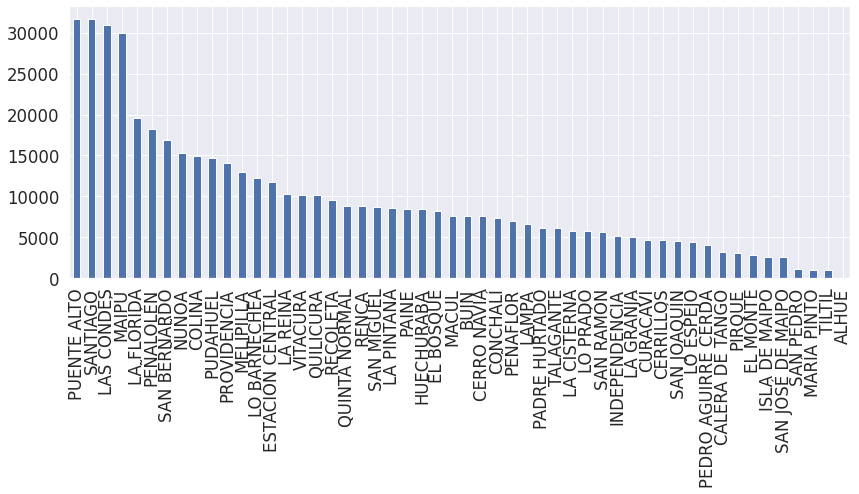

In [ ]:
cont.plot(kind= 'bar', figsize = (14,5))

In [24]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=3,#5  
                    min_child_weight=4, #1 la suma mínima del peso de instancia necesario en una hoja
                    gamma=3,#0 la reducción de pérdida mínima requerida para hacer una nueva división
                    subsample=0.5,#0.8
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=52,
                    seed=27)

In [25]:
training_data=X_train
epochs=300
sk_model = xgb1


sk_model.fit(X_train, y_train)

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)
#val = xgb.DMatrix(X_train['X_val'], label=X_train['Y_val'])
params = sk_model.get_xgb_params()
metrics = ['mlogloss','merror']
params['eval_metric'] = metrics 
store = {}
evallist = [(train,'train'),(test, 'test')] #,
xgb_model = xgb.train(params, 
                      train, 
                      epochs, 
                      evallist,
                      evals_result=store,
                      verbose_eval=100)

print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(X_test), y_test))) 
print('XGBoost Train Accuracy: '+str(sk_model.score(X_train,y_train))) 
print(store)

[0]	train-mlogloss:3.01918	train-merror:0.362348	test-mlogloss:3.03241	test-merror:0.366627
[100]	train-mlogloss:0.967802	train-merror:0.181174	test-mlogloss:1.08797	test-merror:0.187726
[200]	train-mlogloss:0.926472	train-merror:0.181174	test-mlogloss:1.07749	test-merror:0.187726
[299]	train-mlogloss:0.903991	train-merror:0.18104	test-mlogloss:1.07526	test-merror:0.187325
XGBoost Accuracy: 0.8134777376654633
XGBoost Train Accuracy: 0.8189597539778045
{'train': {'mlogloss': [3.019182, 2.616019, 2.347926, 2.146241, 1.993716, 1.87224, 1.771151, 1.68389, 1.608629, 1.548302, 1.493297, 1.445047, 1.401888, 1.363378, 1.328947, 1.299273, 1.272021, 1.247034, 1.226141, 1.206237, 1.188378, 1.172708, 1.158261, 1.145471, 1.133226, 1.122738, 1.112979, 1.104196, 1.096477, 1.089251, 1.082437, 1.076895, 1.070616, 1.06619, 1.06167, 1.05723, 1.053475, 1.050669, 1.047067, 1.044158, 1.041173, 1.038535, 1.03642, 1.034085, 1.031783, 1.02981, 1.027832, 1.025563, 1.023306, 1.021111, 1.019309, 1.017291, 1.01509

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=7, shuffle = True)

results = cross_val_score(sk_model, X_test, y_test, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 80.18% (1.51%)


In [27]:
print(sk_model.feature_importances_)

[0.00171392 0.00168745 0.00762524 0.00759169 0.00912049 0.
 0.01015172 0.01328267 0.01623293 0.01266959 0.02873151 0.01424359
 0.01297308 0.01979831 0.00648897 0.01990315 0.02313645 0.01089671
 0.01000567 0.01120803 0.03974942 0.00807763 0.0132868  0.01903404
 0.01661813 0.02749346 0.02348314 0.01074236 0.01263523 0.01517674
 0.12288991 0.00262232 0.02076765 0.01545721 0.02484942 0.00700352
 0.02216311 0.01334607 0.00805997 0.03508147 0.03676295 0.0142068
 0.01977385 0.02803054 0.02342257 0.03448104 0.0115137  0.01280893
 0.00569996 0.02504559 0.00433494 0.00924508 0.01481155 0.02143977
 0.00237463 0.01334456 0.02670469]


In [28]:
y_pred = sk_model.predict(X_test)

In [29]:
precision_score(y_test, y_pred, average='weighted') #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

0.817083493694437

In [30]:
recall_score(y_test, y_pred, average='weighted')

0.8134777376654633

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
from matplotlib import pyplot as plt
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
sk_model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)
# evaluate performance
yhat = sk_model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = sk_model.evals_result()


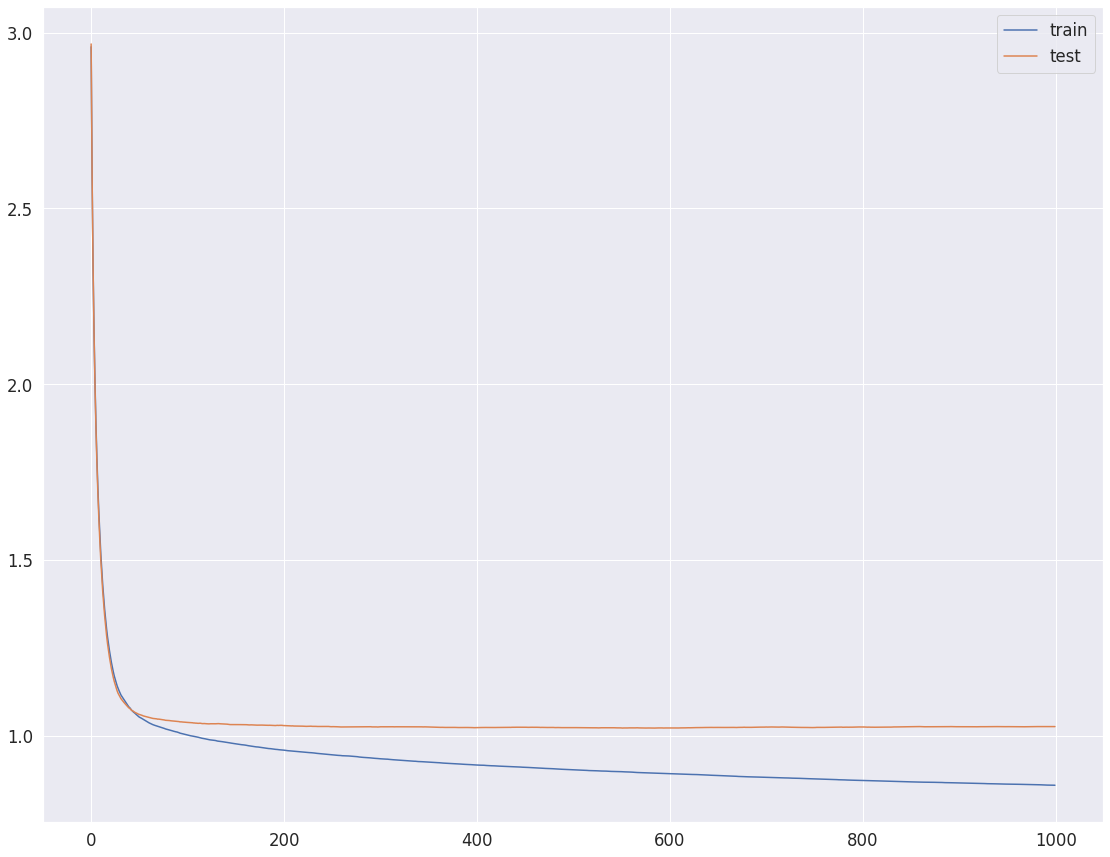

In [ ]:
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

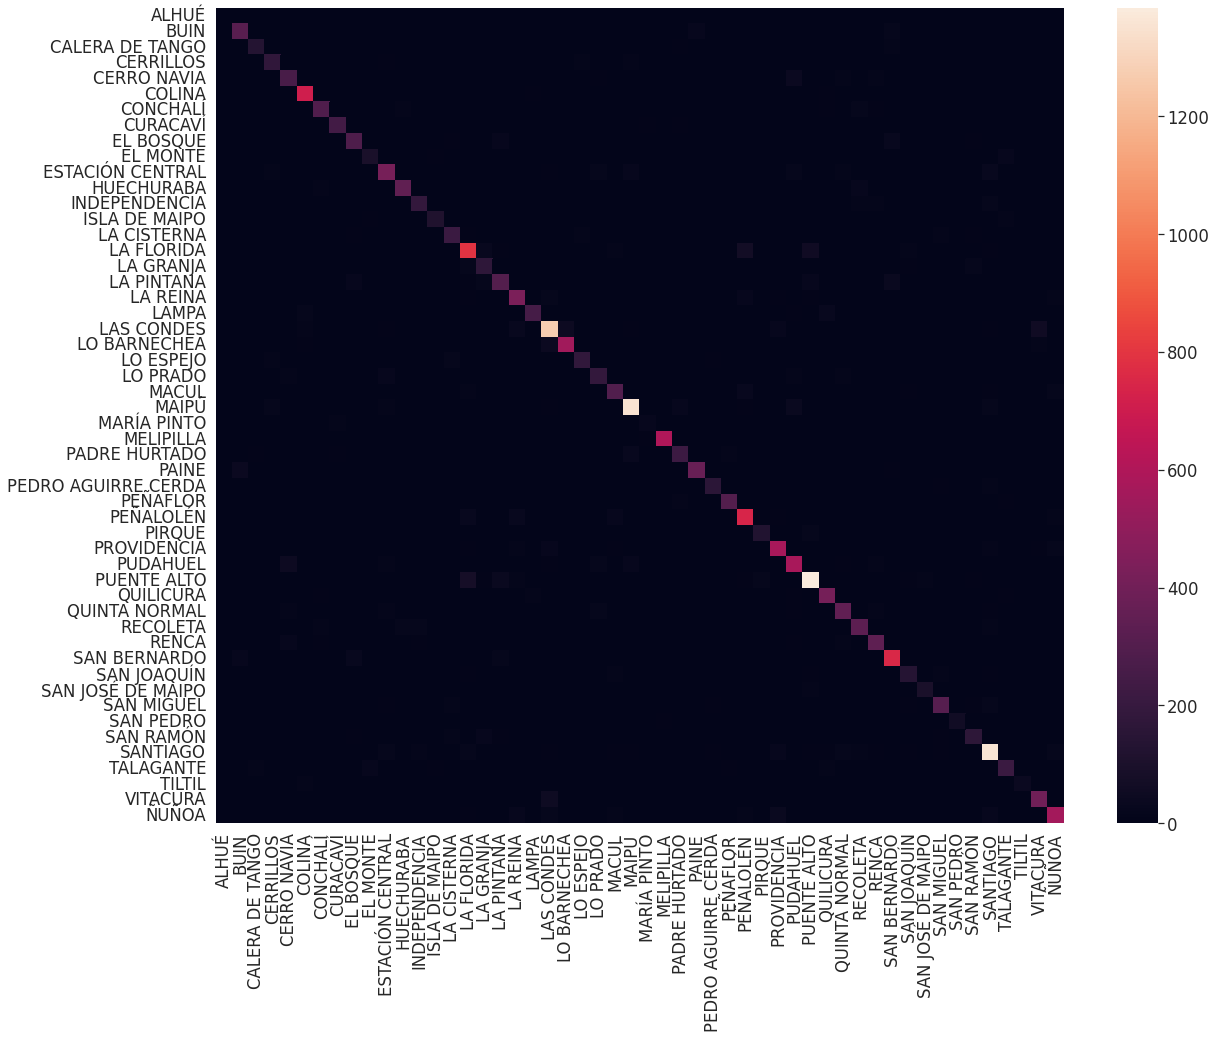

In [16]:
import seaborn as sns
matrix_df = pd.DataFrame(conf_mat, columns = comunas_origin.columns, index = comunas_origin.columns) #
matrix = matrix_df.values
sns.set(font_scale = 1.5,rc = {'figure.figsize':(19,15)})
sns.heatmap(matrix, 
        xticklabels=matrix_df.columns,
        yticklabels=matrix_df.columns)

In [17]:
pd.DataFrame(conf_mat, columns = comunas_origin.columns, index = comunas_origin.columns).to_csv('conf_mat_3.csv')

In [ ]:
conf_mat.shape, comunas_origin.columns.shape